# Manipulation de fichiers CSV


Les fichiers CSV (pour Comma Separated Values) sont des fichiers-texte (ils ne contiennent aucune mise en forme) utilisés pour stocker des données, séparées par des virgules (ou des points-virgules, ou des espaces...). Il n'y a pas de norme officielle du CSV.  


## Ouverture d'un fichier CSV par des logiciels classiques
- Ouvrir avec le Bloc-Notes le fichier `data/exemple.csv`.
- Rajouter une ligne avec une personne supplémentaire, sauvegarder le fichier.
- Ouvrir le fichier avec LibreOffice.

## Exploitation d'un fichier CSV en Python avec le module CSV
L'utilisation d'un tableur peut être délicate lorsque le fichier CSV comporte un très grand nombre de lignes. 
Python permet de lire et d'extraire des informations d'un fichier CSV même très volumineux, grâce à des modules dédiés, comme le bien-nommé `csv` (utilisé ici) ou bien `pandas` (qui sera vu plus tard).

In [1]:
import csv                          
f = open('data/exemple.csv', "r", encoding = 'utf-8') # le "r" signifie "read", le fichier est ouvert en lecture seule
donnees = csv.reader(f)  # donnees est un objet (spécifique au module csv) qui contient des lignes

for ligne in donnees:               
    print(ligne)
    
f.close()    # toujours fermer le fichier !

['Prénom', 'Nom', 'Email', 'SMS']
['John', 'Smith', 'john@example.com', '33123456789']
['Harry', 'Pierce', 'harry@example.com', '33111222222']
['Howard', 'Paige', 'howard@example.com', '33777888898']


### Problèmes : 
1. Les données ne sont pas structurées : la première ligne est la ligne des «descripteurs» (ou des «champs»), alors que les lignes suivantes sont les valeurs de ces descripteurs.
2. La variable `donnees` n'est pas exploitable en l'état. Ce n'est pas une structure connue.


### Améliorations
Au lieu d'utiliser la fonction `csv.reader()`, utilisons `csv.DictReader()`. Comme son nom l'indique, elle renverra une variable contenant des dictionnaires.

In [2]:
import csv
f = open('data/exemple.csv', "r", encoding = 'utf-8')
donnees = csv.DictReader(f)

for ligne in donnees:
    print(dict(ligne))
    
f.close()

{'Prénom': 'John', 'Nom': 'Smith', 'Email': 'john@example.com', 'SMS': '33123456789'}
{'Prénom': 'Harry', 'Nom': 'Pierce', 'Email': 'harry@example.com', 'SMS': '33111222222'}
{'Prénom': 'Howard', 'Nom': 'Paige', 'Email': 'howard@example.com', 'SMS': '33777888898'}


C'est mieux ! Les données sont maintenant des dictionnaires. Mais nous avons juste énuméré 3 dictionnaires. Comment ré-accéder au premier d'entre eux, celui de John Smith ? Essayons :

In [3]:
donnees[0]

TypeError: 'DictReader' object does not support indexing

Nous allons donc créer une liste de dictionnaires.

In [4]:
import csv
f = open('data/exemple.csv', "r", encoding = 'utf-8')
donnees = csv.DictReader(f)
amis = []
for ligne in donnees:
    amis.append(dict(ligne))
    
f.close()

In [5]:
amis

[{'Prénom': 'John',
  'Nom': 'Smith',
  'Email': 'john@example.com',
  'SMS': '33123456789'},
 {'Prénom': 'Harry',
  'Nom': 'Pierce',
  'Email': 'harry@example.com',
  'SMS': '33111222222'},
 {'Prénom': 'Howard',
  'Nom': 'Paige',
  'Email': 'howard@example.com',
  'SMS': '33777888898'}]

In [6]:
print(amis[0]['Email'])

john@example.com


In [7]:
print(amis[2]['Nom'])

Paige


## Un fichier un peu plus intéressant : les joueurs de rugby du TOP14

Le fichier `top14.csv ` du dossier `data` contient tous les joueurs du Top14 de rugby, saison 2019-2020, avec leur date de naissance, leur poste, et leurs mensurations. 

_Ce fichier a été généré par Rémi Deniaud, de l'académie de Bordeaux._


1. Stocker dans  une variable `joueurs`  les renseignements de tous les joueurs présents dans ce fichier csv.

In [2]:
import csv
f = open('data/top14.csv', "r", encoding = 'utf-8')
donnees = csv.DictReader(f)
joueurs = []
for ligne in donnees:
    joueurs.append(dict(ligne))
    
f.close()

2. Combien de joueurs sont présents dans ce fichier ?

In [9]:
len(joueurs)

595

3. Quel est le prénom du joueur n°486 ?

In [10]:
joueurs[486]['Nom']

'Wenceslas LAURET'

### Extraction de données particulières

#### 1. Où joue Baptiste SERIN ?  
La méthode la plus naturelle est de parcourir toute la liste jusqu'à trouver le bon joueur, puis d'afficher son équipe :

In [11]:
for k in joueurs :
    if k['Nom'] == 'Baptiste SERIN' :
        print(k['Equipe'])

Toulon


Une méthode plus efficace est d'utiliser une liste par compréhension incluant un test. 
Rappel : 

In [8]:
exemple = [k for k in range(1,50) if k % 3 == 0]
print(exemple)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]


Procéder de même pour retrouver le club de Baptiste SERIN.

In [13]:
clubSerin = [k['Equipe'] for k in joueurs if k['Nom'] == 'Baptiste SERIN']
print(clubSerin)

['Toulon']


#### 2. Qui sont les joueurs de plus de 140 kg ?

In [18]:
lourds = [(k['Nom'], k['Poids']) for k in joueurs if int(k['Poids']) > 140]
lourds

[('Uini ATONIO', '152'), ('Malik HAMADACHE', '141')]

Il est impératif de convertir la chaine de caractère renvoyée par `k['Poids']` en entier, par la fonction `int()`.

### Exploitation graphique
Nous allons utiliser le module Matplotlib pour illustrer les données de notre fichier csv.

### Exemple 

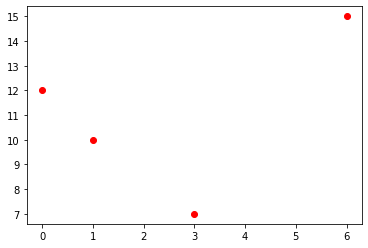

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
X = [0,1,3,6]
Y = [12,10,7,15]
plt.plot(X,Y,'ro') # r pour red, o pour un cercle. voir https://matplotlib.org/api/markers_api.html
plt.show()

### Application

1. Afficher sur un graphique tous les joueurs de rugby du top14, en mettant le poids en abscisse et la taille en ordonnée.
2. Faire apparaître ensuite les joueurs évoluant au poste de Centre en bleu, et les 2ème lignes en vert.

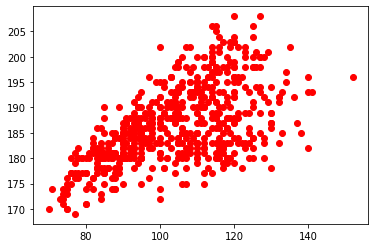

In [5]:

X = [int(k['Poids']) for k in joueurs]
Y = [int(k['Taille']) for k in joueurs]
plt.plot(X,Y,'ro') # r pour red, o pour un cercle. voir https://matplotlib.org/api/markers_api.html
plt.show()

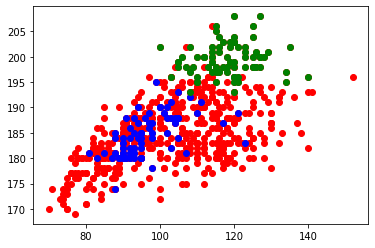

In [7]:

#tous les joueurs
X = [int(k['Poids']) for k in joueurs]
Y = [int(k['Taille']) for k in joueurs]
plt.plot(X,Y,'ro') 

#on recolorie les Centres en bleu
X = [int(k['Poids']) for k in joueurs if k['Poste'] == 'Centre']
Y = [int(k['Taille']) for k in joueurs if k['Poste'] == 'Centre']
plt.plot(X,Y,'bo')

#on recolorie les 2ème ligne en vert
X = [int(k['Poids']) for k in joueurs if k['Poste'] == '2ème ligne']
Y = [int(k['Taille']) for k in joueurs if k['Poste'] == '2ème ligne']
plt.plot(X,Y,'go')



plt.show()